In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pandas as pd
from model_tool import ToxModel
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import model_tool
import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


HELLO from model_tool


# Intro

This Notebook shows how one can rebalance a dataset and use debiased word embeddings to create fairer classifiers for Toxicity classification. We show that using debiased word embeddings can improve fairness via metrics proposed in http://www.aies-conference.com/wp-content/papers/main/AIES_2018_paper_9.pdf. This Notebook contains code from https://github.com/conversationai/unintended-ml-bias-analysis. And is split up into 3 parts

- Dataset Loading and Model Training
- Evaluate Model Fairness
- Visulize Results

# Dataset Loading and Model Training

In [2]:
SPLITS = ['train', 'dev', 'test']

wiki = {}
debias = {}
random = {}
for split in SPLITS:
    wiki[split] = '../data/wiki_%s.csv' % split
    debias[split] = '../data/wiki_debias_%s.csv' % split
    random[split] = '../data/wiki_debias_random_%s.csv' % split
    
hparams_100 = {
    'max_sequence_length': 250,
    'max_num_words': 10000,
    'embedding_dim': 100,
    'embedding_trainable': False,
    'learning_rate': 0.00005,
    'stop_early': True,
    'es_patience': 1,  # Only relevant if STOP_EARLY = True
    'es_min_delta': 0,  # Only relevant if STOP_EARLY = True
    'batch_size': 128,
    'epochs': 4,
    'dropout_rate': 0.3,
    'cnn_filter_sizes': [128, 128, 128],
    'cnn_kernel_sizes': [5, 5, 5],
    'cnn_pooling_sizes': [5, 5, 40],
    'verbose': True
}

In [3]:
def train_models(name,data,word_embeddings_path,params=[]):
    count = 100
    for i in params:
        model_version = name+"_"+str(count)
        count+=1
        model = ToxModel(hparams=i,embeddings_path = word_embeddings_path)
        print("Training {model_version}")
        model.train(data['train'], data['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = model_version)
        print("Testing Model")
        test = pd.read_csv(data['test'])
        print(model.score_auc(test['comment'], test['is_toxic']))

In [4]:
train_models('wiki_debias_random_cnn_v3',random,'../data/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.16868, saving model to ../models/wiki_debias_random_cnn_v3_100_model.h5
 - 9s - loss: 0.2313 - acc: 0.9198 - val_loss: 0.1687 - val_acc: 0.9383
Epoch 2/

Epoch 4/4
Epoch 00004: val_loss improved from 0.14509 to 0.13244, saving model to ../models/wiki_debias_random_cnn_v3_104_model.h5
 - 8s - loss: 0.1330 - acc: 0.9509 - val_loss: 0.1324 - val_acc: 0.9505
Model trained!
Best model saved to ../models/wiki_debias_random_cnn_v3_104_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9540972373824106
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0

In [5]:
train_models('wiki_cnn_v3',wiki,'../data/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17005, saving model to ../models/wiki_cnn_v3_100_model.h5
 - 11s - loss: 0.2386 - acc: 0.9166 - val_loss: 0.1700 - val_acc: 0.9381
Epoch 2/4
Epoch 00002: val_loss improved from 0.17005 to 0.14934, saving model to ../models/wiki_cnn_v3_100_model.h5
 - 8s - loss: 0.1659 - acc: 0.9398 - val_loss: 0.1493 - val_acc: 0.9450
Epoch 3/4
Epoch 00003: val_loss improved from 0.149

Epoch 3/4
Epoch 00003: val_loss improved from 0.15989 to 0.14900, saving model to ../models/wiki_cnn_v3_105_model.h5
 - 8s - loss: 0.1534 - acc: 0.9435 - val_loss: 0.1490 - val_acc: 0.9448
Epoch 4/4
Epoch 00004: val_loss did not improve
 - 8s - loss: 0.1412 - acc: 0.9478 - val_loss: 0.1518 - val_acc: 0.9469
Epoch 00004: early stopping
Model trained!
Best model saved to ../models/wiki_cnn_v3_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9456766606482643
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Tr

In [6]:
train_models('wiki_debias_cnn_v3',debias,'../data/glove.6B.100d.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.16842, saving model to ../models/wiki_debias_cnn_v3_100_model.h5
 - 17s - loss: 0.2310 - acc: 0.9197 - val_loss: 0.1684 - val_acc: 0.9393
Epoch 2/4
Epoch 00002: val_loss improved from 0.16842 to 0.14626, saving model to ../models/wiki_debias_cnn_v3_100_model.h5
 - 8s - loss: 0.1625 - acc: 0.9407 - val_loss: 0.1463 - val_acc: 0.9467
Epoch 3/4
Epoch 00003: val_loss impro

 - 19s - loss: 0.2314 - acc: 0.9194 - val_loss: 0.1686 - val_acc: 0.9385
Epoch 2/4
Epoch 00002: val_loss improved from 0.16863 to 0.15374, saving model to ../models/wiki_debias_cnn_v3_105_model.h5
 - 8s - loss: 0.1631 - acc: 0.9406 - val_loss: 0.1537 - val_acc: 0.9430
Epoch 3/4
Epoch 00003: val_loss improved from 0.15374 to 0.15009, saving model to ../models/wiki_debias_cnn_v3_105_model.h5
 - 8s - loss: 0.1445 - acc: 0.9467 - val_loss: 0.1501 - val_acc: 0.9429
Epoch 4/4
Epoch 00004: val_loss improved from 0.15009 to 0.13161, saving model to ../models/wiki_debias_cnn_v3_105_model.h5
 - 8s - loss: 0.1328 - acc: 0.9519 - val_loss: 0.1316 - val_acc: 0.9511
Model trained!
Best model saved to ../models/wiki_debias_cnn_v3_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9544777033801114
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [12

In [7]:
train_models('cnn_debias_tox_v3_debiased_WE',debias,'../data/glove_debias.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.18937, saving model to ../models/cnn_debias_tox_v3_debiased_WE_100_model.h5
 - 22s - loss: 0.2287 - acc: 0.9198 - val_loss: 0.1894 - val_acc: 0.9302
Epoch 2/4
Epoch 00002: val_loss improved from 0.18937 to 0.15116, saving model to ../models/cnn_debias_tox_v3_debiased_WE_100_model.h5
 - 8s - loss: 0.1615 - acc: 0.9411 - val_loss: 0.1512 - val_acc: 0.9438
Epoch 3/4
Epoch

 - 25s - loss: 0.2309 - acc: 0.9201 - val_loss: 0.1673 - val_acc: 0.9398
Epoch 2/4
Epoch 00002: val_loss improved from 0.16729 to 0.14629, saving model to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
 - 9s - loss: 0.1624 - acc: 0.9408 - val_loss: 0.1463 - val_acc: 0.9458
Epoch 3/4
Epoch 00003: val_loss did not improve
 - 9s - loss: 0.1439 - acc: 0.9473 - val_loss: 0.1481 - val_acc: 0.9480
Epoch 00003: early stopping
Model trained!
Best model saved to ../models/cnn_debias_tox_v3_debiased_WE_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9414924492848463
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer

In [8]:
train_models('we_wiki_cnn',wiki,'../data/glove_debias.txt',[hparams_100]*10)

Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17198, saving model to ../models/we_wiki_cnn_100_model.h5
 - 27s - loss: 0.2433 - acc: 0.9154 - val_loss: 0.1720 - val_acc: 0.9381
Epoch 2/4
Epoch 00002: val_loss improved from 0.17198 to 0.15495, saving model to ../models/we_wiki_cnn_100_model.h5
 - 8s - loss: 0.1666 - acc: 0.9392 - val_loss: 0.1550 - val_acc: 0.9444
Epoch 3/4
Epoch 00003: val_loss improved from 0.154

Epoch 4/4
Epoch 00004: val_loss improved from 0.14805 to 0.13385, saving model to ../models/we_wiki_cnn_105_model.h5
 - 8s - loss: 0.1373 - acc: 0.9496 - val_loss: 0.1339 - val_acc: 0.9499
Model trained!
Best model saved to ../models/we_wiki_cnn_105_model.h5
Loading best model from checkpoint...
Model loaded!
Testing Model
0.9536839626516601
Hyperparameters
---------------
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
learning_rate: 5e-05
es_patience: 1
batch_size: 128
epochs: 4
cnn_filter_sizes: [128, 128, 128]
max_sequence_length: 250
stop_early: True
embedding_trainable: False
max_num_words: 10000
es_min_delta: 0
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]

Training {model_version}
Fitting tokenizer...
Tokenizer fitted!
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
Epoch 00001: val_loss improved from inf to 0.17586, saving model to ../m

# Evaluate Model Fairness

In [9]:
%%time

MODEL_DIR = '../models/'

wiki_model_names = ['wiki_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
wiki_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in wiki_model_names]

random_model_names = ['wiki_debias_random_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
random_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in random_model_names]

debias_model_names = ['wiki_debias_cnn_v3_{}'.format(i) for i in xrange(100, 110)]
debias_models = [model_tool.ToxModel(name,model_dir=MODEL_DIR) for name in debias_model_names]

we_debias_model_names = ['cnn_debias_tox_v3_debiased_WE_{}'.format(i) for i in xrange(100, 110)]
we_debias_models = [model_tool.ToxModel(name,embeddings_path='../data/glove_debias.txt',model_dir=MODEL_DIR) for name in we_debias_model_names]

we_wiki_model_names = ['we_wiki_cnn_{}'.format(i) for i in xrange(100, 110)]
we_wiki_models = [model_tool.ToxModel(name,embeddings_path='../data/glove_debias.txt',model_dir=MODEL_DIR) for name in we_wiki_model_names]


Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_cnn_v3_100
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_cnn_v3_101
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_debias_cnn_v3_102
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_debias_cnn_v3_103
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: 

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: we_wiki_cnn_104
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: we_wiki_cnn_105
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128

In [10]:
all_model_families = [wiki_models, random_models, debias_models,we_debias_models,we_wiki_models]
all_model_families_names = [wiki_model_names, random_model_names, debias_model_names,we_debias_model_names,we_wiki_model_names]

In [11]:
all_models = wiki_models + random_models + debias_models+ we_debias_models+we_wiki_models

In [12]:
os.remove('../data/eval_datasets/bias_madlibs_77k_scored.csv')
madlibs = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/eval_datasets/bias_madlibs_77k.csv',
    scored_path='../data/eval_datasets/bias_madlibs_77k_scored.csv',
    postprocess_fn=model_tool.postprocess_madlibs,
    )

2019-02-26 16:38:30.248140 Scoring with wiki_cnn_v3_100...
2019-02-26 16:38:48.284250 Scoring with wiki_cnn_v3_101...
2019-02-26 16:39:06.600216 Scoring with wiki_cnn_v3_102...
2019-02-26 16:39:25.211014 Scoring with wiki_cnn_v3_103...
2019-02-26 16:39:44.182313 Scoring with wiki_cnn_v3_104...
2019-02-26 16:40:03.013318 Scoring with wiki_cnn_v3_105...
2019-02-26 16:40:22.122003 Scoring with wiki_cnn_v3_106...
2019-02-26 16:40:41.263000 Scoring with wiki_cnn_v3_107...
2019-02-26 16:41:00.504089 Scoring with wiki_cnn_v3_108...
2019-02-26 16:41:19.668225 Scoring with wiki_cnn_v3_109...
2019-02-26 16:41:38.768747 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-26 16:41:57.755203 Scoring with wiki_debias_random_cnn_v3_101...
2019-02-26 16:42:16.885653 Scoring with wiki_debias_random_cnn_v3_102...
2019-02-26 16:42:36.040079 Scoring with wiki_debias_random_cnn_v3_103...
2019-02-26 16:42:54.993623 Scoring with wiki_debias_random_cnn_v3_104...
2019-02-26 16:43:13.872141 Scoring with wiki_

In [13]:
os.remove('../data/wiki_test_scored.csv')
wiki_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_test.csv',
    scored_path='../data/wiki_test_scored.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-02-26 16:54:36.268934 Scoring with wiki_cnn_v3_100...
2019-02-26 16:54:40.881112 Scoring with wiki_cnn_v3_101...
2019-02-26 16:54:45.487353 Scoring with wiki_cnn_v3_102...
2019-02-26 16:54:50.225032 Scoring with wiki_cnn_v3_103...
2019-02-26 16:54:54.860248 Scoring with wiki_cnn_v3_104...
2019-02-26 16:54:59.548208 Scoring with wiki_cnn_v3_105...
2019-02-26 16:55:04.072383 Scoring with wiki_cnn_v3_106...
2019-02-26 16:55:08.661064 Scoring with wiki_cnn_v3_107...
2019-02-26 16:55:13.203307 Scoring with wiki_cnn_v3_108...
2019-02-26 16:55:17.798637 Scoring with wiki_cnn_v3_109...
2019-02-26 16:55:22.438759 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-26 16:55:27.011971 Scoring with wiki_debias_random_cnn_v3_101...
2019-02-26 16:55:31.613030 Scoring with wiki_debias_random_cnn_v3_102...
2019-02-26 16:55:36.234134 Scoring with wiki_debias_random_cnn_v3_103...
2019-02-26 16:55:40.867301 Scoring with wiki_debias_random_cnn_v3_104...
2019-02-26 16:55:45.502061 Scoring with wiki_

In [14]:
os.remove('../data/wiki_debias_test_scored_newest.csv')
os.remove('../data/wiki_debias_random_test_scored_newest.csv')

wiki_debias_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_test.csv',
    scored_path='../data/wiki_debias_test_scored_newest.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

wiki_random_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_random_test.csv',
    scored_path='../data/wiki_debias_random_test_scored_newest.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-02-26 16:58:28.444244 Scoring with wiki_cnn_v3_100...
2019-02-26 16:58:33.136747 Scoring with wiki_cnn_v3_101...
2019-02-26 16:58:37.946280 Scoring with wiki_cnn_v3_102...
2019-02-26 16:58:42.687246 Scoring with wiki_cnn_v3_103...
2019-02-26 16:58:47.367072 Scoring with wiki_cnn_v3_104...
2019-02-26 16:58:59.659269 Scoring with wiki_cnn_v3_105...
2019-02-26 16:59:04.417438 Scoring with wiki_cnn_v3_106...
2019-02-26 16:59:09.166217 Scoring with wiki_cnn_v3_107...
2019-02-26 16:59:13.850565 Scoring with wiki_cnn_v3_108...
2019-02-26 16:59:18.612215 Scoring with wiki_cnn_v3_109...
2019-02-26 16:59:23.348404 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-26 16:59:28.149632 Scoring with wiki_debias_random_cnn_v3_101...
2019-02-26 16:59:32.929600 Scoring with wiki_debias_random_cnn_v3_102...
2019-02-26 16:59:37.670950 Scoring with wiki_debias_random_cnn_v3_103...
2019-02-26 16:59:42.486053 Scoring with wiki_debias_random_cnn_v3_104...
2019-02-26 16:59:47.232779 Scoring with wiki_

# Visualize Results

## AUC

original models:
mean AUC: 0.9434012115622231
median: 0.9431133499227263
stddev: 0.008416449872344623


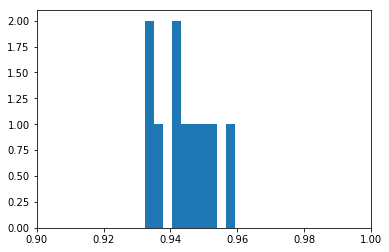



random models:
mean AUC: 0.9384022028679728
median: 0.9397111090202523
stddev: 0.0171393036665692


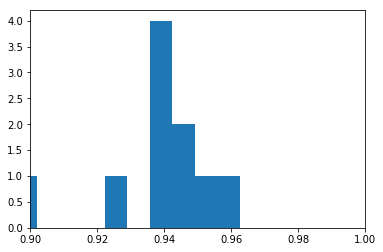



debias models:
mean AUC: 0.9562388699783437
median: 0.9565005798616975
stddev: 0.0052698795066365035


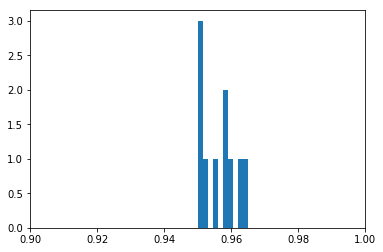



we debias models:
mean AUC: 0.9693597701112312
median: 0.9715209375248829
stddev: 0.007181483400392318


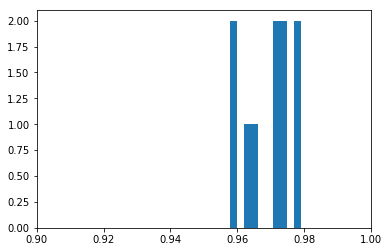



we wiki models:
mean AUC: 0.9717295321316082
median: 0.9725888293321944
stddev: 0.005362919360320891


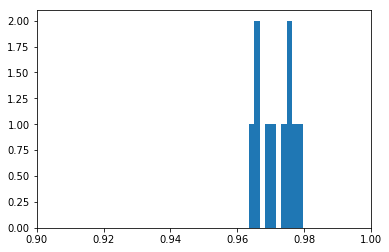

In [15]:
print('original models:')
model_bias_analysis.plot_model_family_auc(madlibs, wiki_model_names, 'label')
print('\n\nrandom models:')
model_bias_analysis.plot_model_family_auc(madlibs, random_model_names, 'label')
print('\n\ndebias models:')
model_bias_analysis.plot_model_family_auc(madlibs, debias_model_names, 'label');
print('\n\nwe debias models:')
model_bias_analysis.plot_model_family_auc(madlibs, we_debias_model_names, 'label');
print('\n\nwe wiki models:')
model_bias_analysis.plot_model_family_auc(madlibs, we_wiki_model_names, 'label');

In [16]:
all_model_families_names

[['wiki_cnn_v3_100',
  'wiki_cnn_v3_101',
  'wiki_cnn_v3_102',
  'wiki_cnn_v3_103',
  'wiki_cnn_v3_104',
  'wiki_cnn_v3_105',
  'wiki_cnn_v3_106',
  'wiki_cnn_v3_107',
  'wiki_cnn_v3_108',
  'wiki_cnn_v3_109'],
 ['wiki_debias_random_cnn_v3_100',
  'wiki_debias_random_cnn_v3_101',
  'wiki_debias_random_cnn_v3_102',
  'wiki_debias_random_cnn_v3_103',
  'wiki_debias_random_cnn_v3_104',
  'wiki_debias_random_cnn_v3_105',
  'wiki_debias_random_cnn_v3_106',
  'wiki_debias_random_cnn_v3_107',
  'wiki_debias_random_cnn_v3_108',
  'wiki_debias_random_cnn_v3_109'],
 ['wiki_debias_cnn_v3_100',
  'wiki_debias_cnn_v3_101',
  'wiki_debias_cnn_v3_102',
  'wiki_debias_cnn_v3_103',
  'wiki_debias_cnn_v3_104',
  'wiki_debias_cnn_v3_105',
  'wiki_debias_cnn_v3_106',
  'wiki_debias_cnn_v3_107',
  'wiki_debias_cnn_v3_108',
  'wiki_debias_cnn_v3_109'],
 ['cnn_debias_tox_v3_debiased_WE_100',
  'cnn_debias_tox_v3_debiased_WE_101',
  'cnn_debias_tox_v3_debiased_WE_102',
  'cnn_debias_tox_v3_debiased_WE_103',
 

In [17]:
for dataset_name, dataset in [('orig test', wiki_test),
                              ('debias test', wiki_debias_test),
                              ('random test', wiki_random_test),
                              ('madlibs', madlibs)]:
    print('\n\nAUCs on', dataset_name)
    for model_family in all_model_families_names:
        fam_name = model_bias_analysis.model_family_name(model_family)
        fam_auc = model_bias_analysis.model_family_auc(dataset, model_family, 'label')
        print('{:30s}  mean {:.4f}\t median {:.4f}\t stddev {:.4f}'.format(fam_name, fam_auc['mean'], fam_auc['median'], fam_auc['std']))



AUCs on orig test
wiki_cnn_v3_10                  mean 0.9528	 median 0.9537	 stddev 0.0029
wiki_debias_random_cnn_v3_10    mean 0.9536	 median 0.9536	 stddev 0.0011
wiki_debias_cnn_v3_10           mean 0.9535	 median 0.9539	 stddev 0.0012
cnn_debias_tox_v3_debiased_WE_10  mean 0.9499	 median 0.9526	 stddev 0.0050
we_wiki_cnn_10                  mean 0.9519	 median 0.9529	 stddev 0.0032


AUCs on debias test
wiki_cnn_v3_10                  mean 0.9506	 median 0.9512	 stddev 0.0029
wiki_debias_random_cnn_v3_10    mean 0.9516	 median 0.9517	 stddev 0.0011
wiki_debias_cnn_v3_10           mean 0.9534	 median 0.9539	 stddev 0.0012
cnn_debias_tox_v3_debiased_WE_10  mean 0.9502	 median 0.9529	 stddev 0.0050
we_wiki_cnn_10                  mean 0.9517	 median 0.9527	 stddev 0.0032


AUCs on random test
wiki_cnn_v3_10                  mean 0.9535	 median 0.9544	 stddev 0.0029
wiki_debias_random_cnn_v3_10    mean 0.9545	 median 0.9545	 stddev 0.0012
wiki_debias_cnn_v3_10           mean 0.9543	

## Per-term pinned AUC

Per-term pinned AUC values show improved scores and less disaprity for the debiased model.

In [18]:
madlibs_terms = model_bias_analysis.read_identity_terms('../data/bias_madlibs_data/adjectives_people.txt')

In [19]:
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'text', madlibs_terms)

In [20]:
_raw_term_madlibs_aucs = model_bias_analysis.per_subgroup_aucs(madlibs, madlibs_terms, all_model_families_names, 'label')

per-term AUC histogram: mean AUCs across terms for: wiki_cnn_v3_10_mean


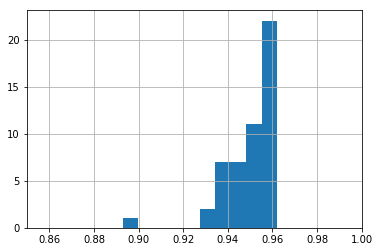

per-term AUC histogram: mean AUCs across terms for: wiki_debias_random_cnn_v3_10_mean


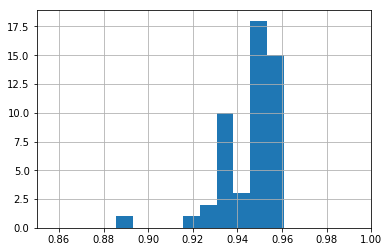

per-term AUC histogram: mean AUCs across terms for: wiki_debias_cnn_v3_10_mean


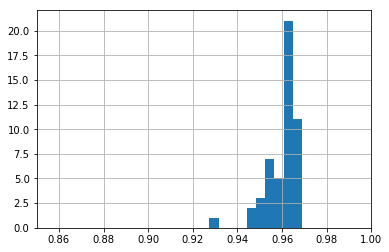

per-term AUC histogram: mean AUCs across terms for: cnn_debias_tox_v3_debiased_WE_10_mean


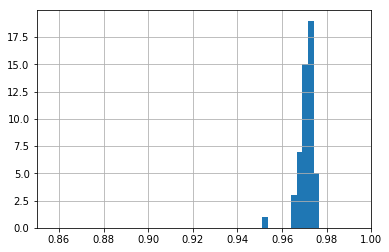

per-term AUC histogram: mean AUCs across terms for: we_wiki_cnn_10_mean


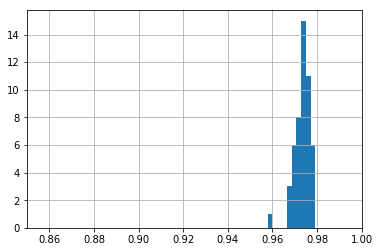

In [21]:
orig_mean = 'wiki_cnn_v3_10_mean'
random_mean = 'wiki_debias_random_cnn_v3_10_mean'
debias_mean= 'wiki_debias_cnn_v3_10_mean'
we_debias_mean = 'cnn_debias_tox_v3_debiased_WE_10_mean'
we_wiki_mean = 'we_wiki_cnn_10_mean'


for mean_col in [orig_mean, random_mean, debias_mean,we_debias_mean,we_wiki_mean]:
    print('per-term AUC histogram: mean AUCs across terms for:', mean_col)
    _raw_term_madlibs_aucs[mean_col].hist()
    plt.gca().set_xlim((0.85, 1.0))
    plt.show()

In [66]:
execfile('model_bias_analysis.py')

wiki_cnn_v3_10_aucs
wiki_debias_random_cnn_v3_10_aucs
wiki_debias_cnn_v3_10_aucs
cnn_debias_tox_v3_debiased_WE_10_aucs
we_wiki_cnn_10_aucs


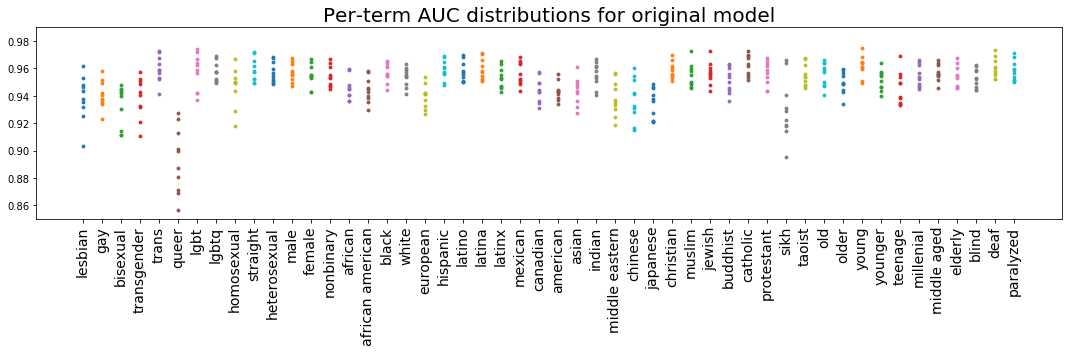

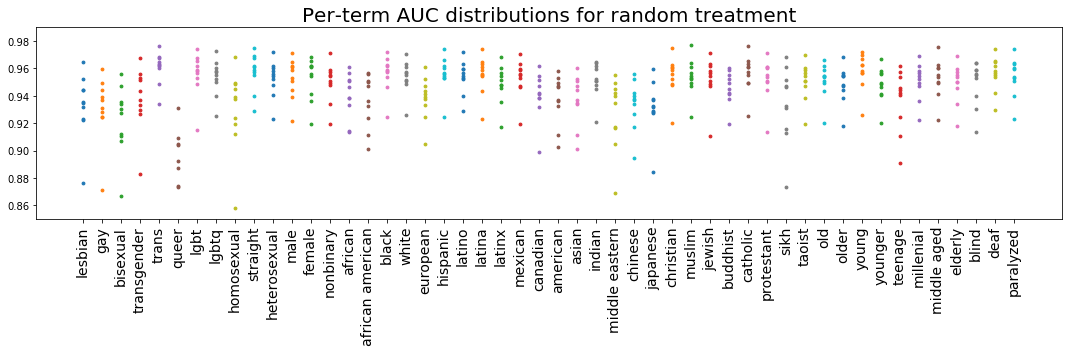

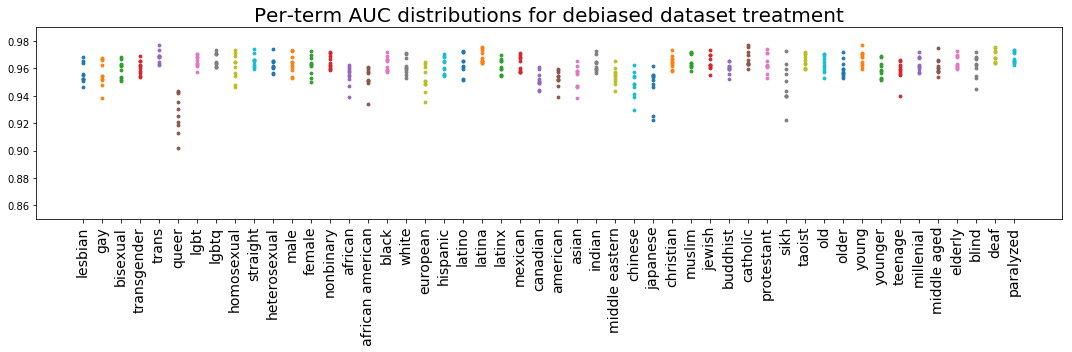

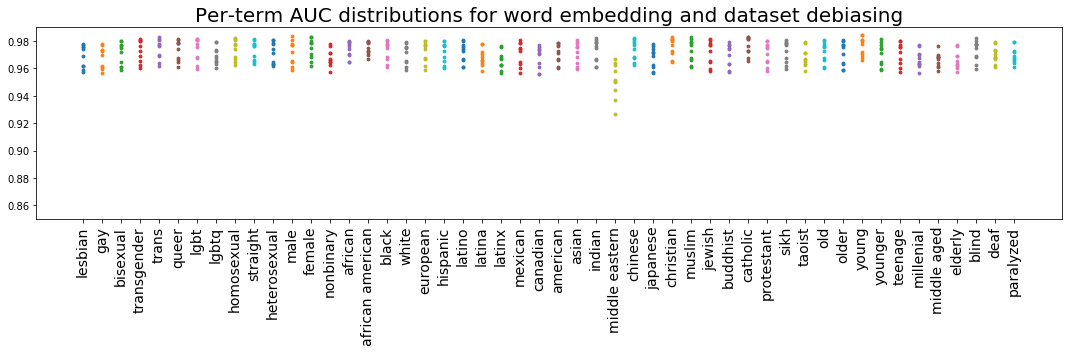

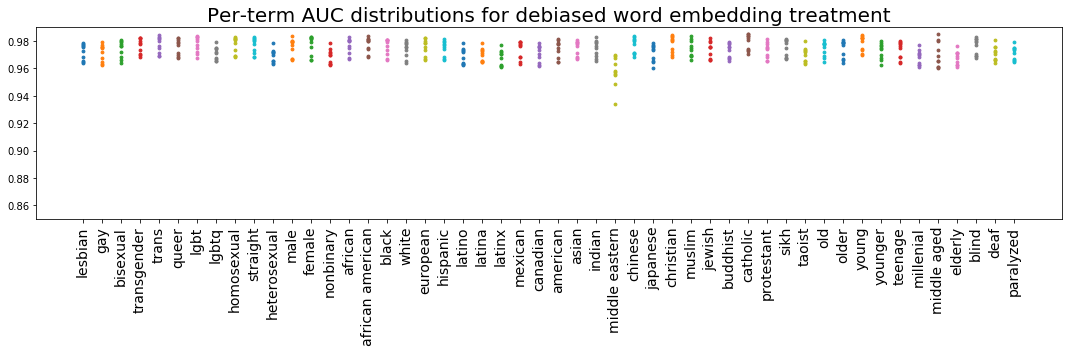

In [68]:
orig_aucs = 'wiki_cnn_v3_10_aucs'
random_aucs = 'wiki_debias_random_cnn_v3_10_aucs'
debias_aucs= 'wiki_debias_cnn_v3_10_aucs'
we_debias_aucs = 'cnn_debias_tox_v3_debiased_WE_10_aucs'
we_wiki_aucs = 'we_wiki_cnn_10_aucs'
for title, auc_collection_col in [('original model',orig_aucs), ('random treatment',random_aucs), ('debiased dataset treatment',debias_aucs),('word embedding and dataset debiasing',we_debias_aucs),('debiased word embedding treatment',we_wiki_aucs)]:
    print(auc_collection_col)
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_madlibs_aucs, 'subgroup', auc_collection_col, title='Per-term AUC distributions for ' + title,
        file_name='madlibs',y_lim=(0.85, .99))

### Per-term  AUCs on the wikipedia dataset

In [23]:
model_bias_analysis.add_subgroup_columns_from_text(wiki_test, 'text', madlibs_terms)

In [24]:
%%time
_raw_term_wiki_aucs = model_bias_analysis.per_subgroup_aucs(wiki_test, madlibs_terms, all_model_families_names, 'label')

/home/csweeney/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


CPU times: user 1min 30s, sys: 0 ns, total: 1min 30s
Wall time: 1min 30s


We don't see a strong effect in per-term pinned AUCs on the wikipedia test set. This isn't surprising, as the dataset bias affects the test set too: there are few non-toxic examples using the bias terms, and so the AUC of the original models does not suffer.

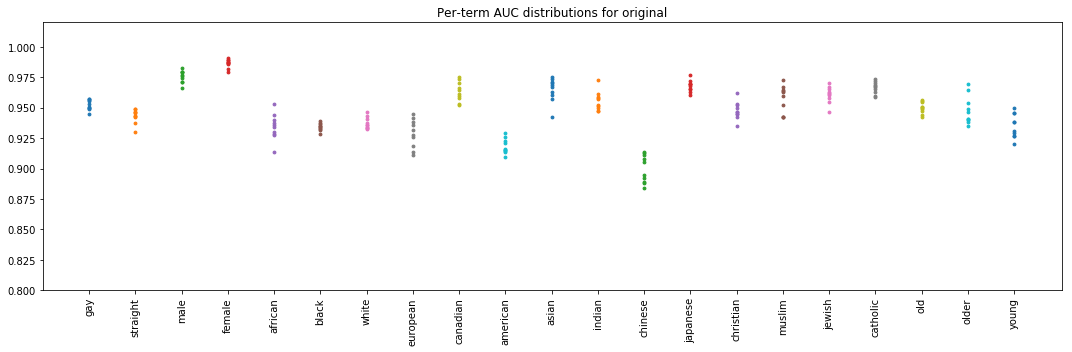

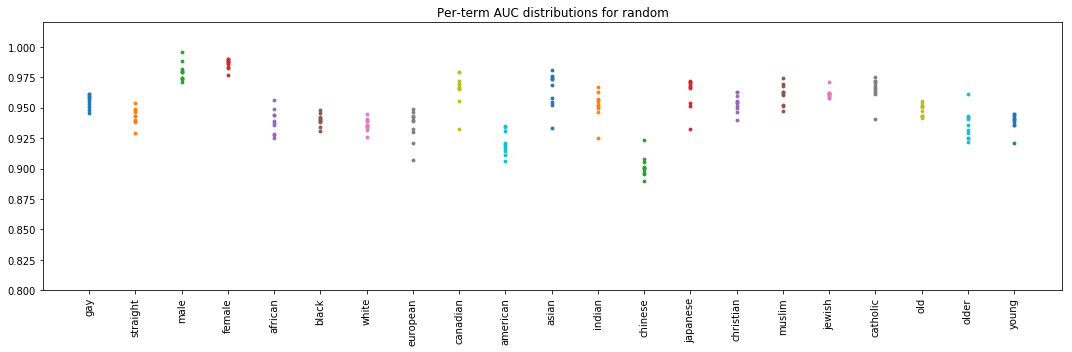

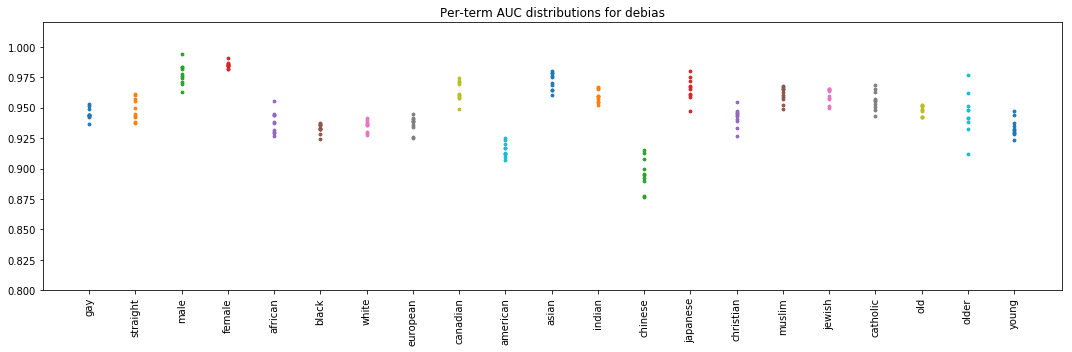

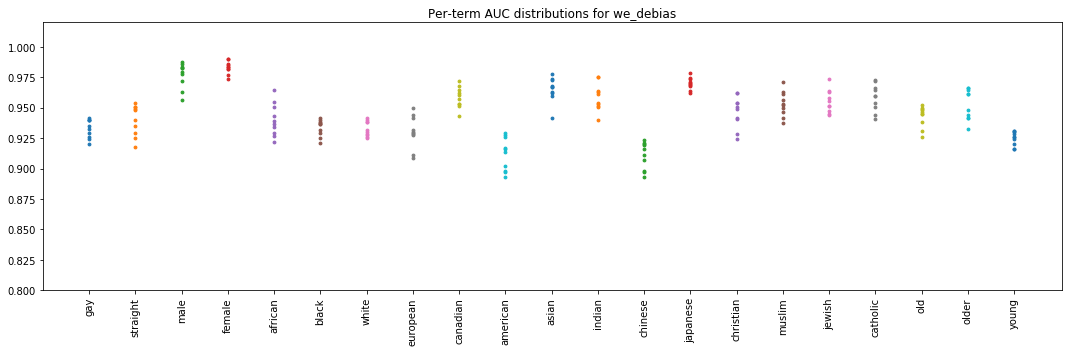

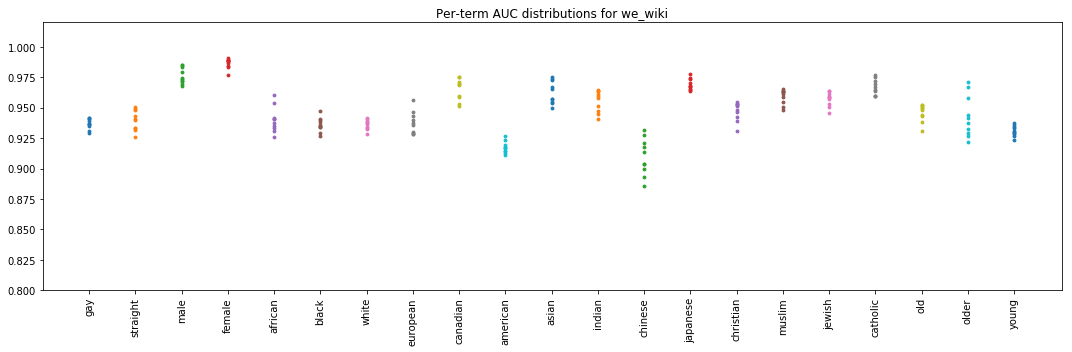

In [25]:
# AUC on tiny datasets is very noisy.
_term_wiki_aucs_nottiny = _raw_term_wiki_aucs[_raw_term_wiki_aucs['subset_size'] > 50]

for title, auc_collection_col in [('original',orig_aucs), ('random',random_aucs), ('debias',debias_aucs),('we_debias',we_debias_aucs),('we_wiki',we_wiki_aucs)]:
    model_bias_analysis.per_subgroup_scatterplots(_term_wiki_aucs_nottiny, 'subgroup', auc_collection_col,
                                              title='Per-term AUC distributions for ' + title, y_lim=(0.8, 1.02),
                                              file_name='wiki')

## Qualitative look

In [26]:
# TODO(jetpack): add column to bias madlibs dataset to allow selecting by template
# to more easily observe discrepancies in scores for the same template.

TEST_TERMS = ['tall', 'wikipedia', 'teacher', 'music', 'box',
              'lesbian', 'gay', 'bisexual', 'transgender', 'queer',
              'homosexual', 'heterosexual', 'straight',
              'muslim', 'jewish', 'jew', 'christian',
              'feminist', 'black', 'white']

def _print_template_scores(models):
    texts = ['i am a {} person'.format(term) for term in TEST_TERMS]
    median_scores = [{'median': np.median([model.predict([text]) for model in models]),
                      'stddev': np.std([model.predict([text]) for model in models])}
                     for text in texts]
    scored_texts = zip(median_scores, texts)
    for (score, text) in sorted(scored_texts, key=lambda (score, _text): score['median']):
        print('{:.3f}  (std: {:.4f})  {}'.format(score['median'], score['stddev'], text))
    plt.hist([x['median'] for x in median_scores])
    plt.gca().set_xlim([0, 1])
    plt.gca().set_ylim([0, 10])

0.030  (std: 0.0171)  i am a music person
0.039  (std: 0.0211)  i am a box person
0.051  (std: 0.0832)  i am a heterosexual person
0.064  (std: 0.0415)  i am a teacher person
0.084  (std: 0.0759)  i am a wikipedia person
0.085  (std: 0.0653)  i am a straight person
0.091  (std: 0.0616)  i am a christian person
0.092  (std: 0.0495)  i am a white person
0.127  (std: 0.0965)  i am a jewish person
0.132  (std: 0.1132)  i am a feminist person
0.161  (std: 0.0992)  i am a tall person
0.181  (std: 0.0669)  i am a muslim person
0.261  (std: 0.0982)  i am a black person
0.389  (std: 0.1484)  i am a lesbian person
0.428  (std: 0.1643)  i am a homosexual person
0.430  (std: 0.1440)  i am a transgender person
0.430  (std: 0.1568)  i am a gay person
0.502  (std: 0.1590)  i am a bisexual person
0.760  (std: 0.1515)  i am a queer person
0.770  (std: 0.1884)  i am a jew person


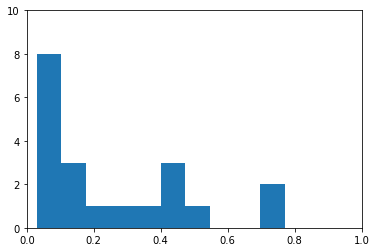

In [27]:
_print_template_scores(wiki_models)

0.016  (std: 0.0191)  i am a music person
0.032  (std: 0.0395)  i am a teacher person
0.035  (std: 0.0203)  i am a box person
0.060  (std: 0.0240)  i am a heterosexual person
0.060  (std: 0.0247)  i am a white person
0.061  (std: 0.0308)  i am a straight person
0.077  (std: 0.1017)  i am a wikipedia person
0.097  (std: 0.0534)  i am a christian person
0.113  (std: 0.0667)  i am a muslim person
0.135  (std: 0.0684)  i am a tall person
0.155  (std: 0.0851)  i am a jewish person
0.165  (std: 0.0732)  i am a feminist person
0.186  (std: 0.0726)  i am a black person
0.421  (std: 0.0994)  i am a gay person
0.431  (std: 0.1319)  i am a lesbian person
0.440  (std: 0.1635)  i am a homosexual person
0.463  (std: 0.1445)  i am a transgender person
0.529  (std: 0.1423)  i am a bisexual person
0.734  (std: 0.1452)  i am a jew person
0.760  (std: 0.1058)  i am a queer person


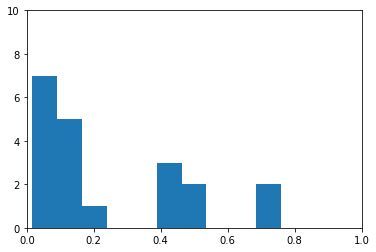

In [28]:
_print_template_scores(random_models)

0.015  (std: 0.0139)  i am a music person
0.034  (std: 0.0203)  i am a teacher person
0.044  (std: 0.0176)  i am a box person
0.061  (std: 0.0385)  i am a christian person
0.065  (std: 0.0497)  i am a straight person
0.068  (std: 0.0362)  i am a white person
0.071  (std: 0.0305)  i am a wikipedia person
0.083  (std: 0.0730)  i am a muslim person
0.086  (std: 0.0286)  i am a feminist person
0.091  (std: 0.0974)  i am a tall person
0.093  (std: 0.0605)  i am a jewish person
0.102  (std: 0.0499)  i am a heterosexual person
0.164  (std: 0.0744)  i am a gay person
0.175  (std: 0.0903)  i am a lesbian person
0.176  (std: 0.0783)  i am a transgender person
0.187  (std: 0.0923)  i am a black person
0.197  (std: 0.1319)  i am a homosexual person
0.282  (std: 0.1124)  i am a bisexual person
0.618  (std: 0.1285)  i am a queer person
0.737  (std: 0.1005)  i am a jew person


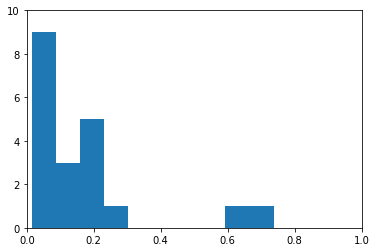

In [29]:
_print_template_scores(debias_models)

### Equality of Opportunity

To evaluate equality of opportunity, we compare false negative rates on a per-term basis.

In [30]:
def neg_table_means(term_neg_rates):
    """Helper to display just the mean values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_fnr_mean',
              'random_fnr_mean',
              'debias_fnr_mean',
              'orig_tnr_mean',
              'random_tnr_mean',
              'debias_tnr_mean',
            ]]
            .sort_values('orig_fnr_mean')
           )

def neg_table_stddevs(term_neg_rates):
    """Helper to display just the standard deviation values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_fnr_mean',  # just for sorting
            ]]
            .sort_values('orig_fnr_mean')
            .drop('orig_fnr_mean', axis=1)
           )

### Threshold 0.5

In [31]:
%%time

# threshold = .50 

_raw_term_neg_rates_50 = model_bias_analysis.per_subgroup_negative_rates(madlibs, madlibs_terms, all_model_families_names, 0.5, 'label')

CPU times: user 7.13 s, sys: 0 ns, total: 7.13 s
Wall time: 7.13 s


### Threshold using per-model equal error rate on overall madlibs dataset

In [32]:
%%time

# Compute the equal error rate for all models on the overall madlibs dataset in order to
# compute the false/true negative rates table at the EER for each model.

# Flattened list of all models.
_all_model_names = []
for model_family_names in all_model_families_names:
    _all_model_names.extend(model_family_names)
_model_eers_madlibs = model_bias_analysis.per_model_eer(madlibs, 'label', _all_model_names)

CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 1min 9s


In [33]:
%%time
_raw_term_neg_rates_madlibs_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, 'label')

CPU times: user 7.15 s, sys: 0 ns, total: 7.15 s
Wall time: 7.16 s


In [34]:
_raw_term_neg_rates_madlibs_eer.columns

Index([u'cnn_debias_tox_v3_debiased_WE_10_fnr_mean',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_median',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_std',
       u'cnn_debias_tox_v3_debiased_WE_10_fnr_values',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_mean',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_median',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_std',
       u'cnn_debias_tox_v3_debiased_WE_10_tnr_values', u'subgroup',
       u'subset_size', u'we_wiki_cnn_10_fnr_mean',
       u'we_wiki_cnn_10_fnr_median', u'we_wiki_cnn_10_fnr_std',
       u'we_wiki_cnn_10_fnr_values', u'we_wiki_cnn_10_tnr_mean',
       u'we_wiki_cnn_10_tnr_median', u'we_wiki_cnn_10_tnr_std',
       u'we_wiki_cnn_10_tnr_values', u'wiki_cnn_v3_10_fnr_mean',
       u'wiki_cnn_v3_10_fnr_median', u'wiki_cnn_v3_10_fnr_std',
       u'wiki_cnn_v3_10_fnr_values', u'wiki_cnn_v3_10_tnr_mean',
       u'wiki_cnn_v3_10_tnr_median', u'wiki_cnn_v3_10_tnr_std',
       u'wiki_cnn_v3_10_tnr_values', u'wiki_debias_cnn_

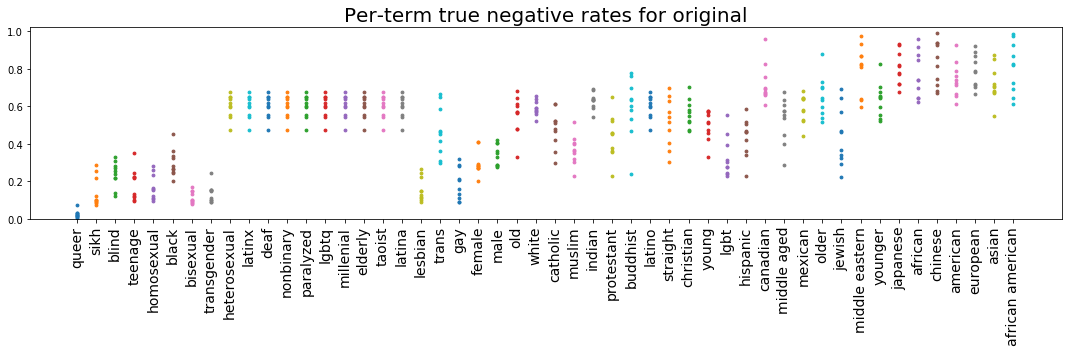

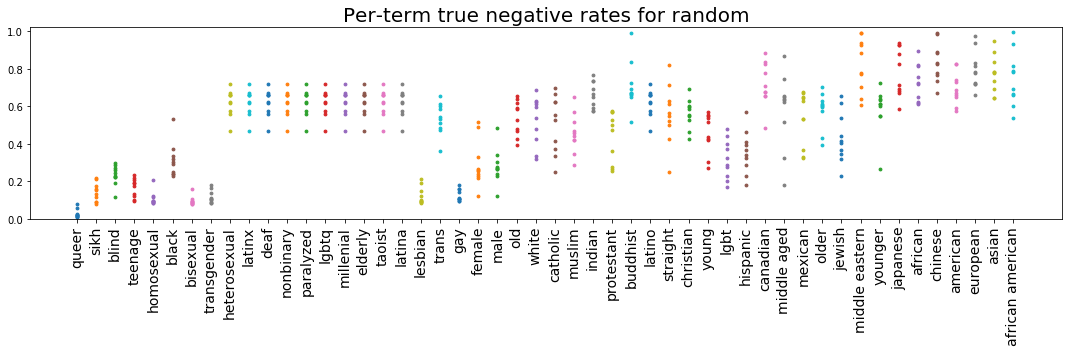

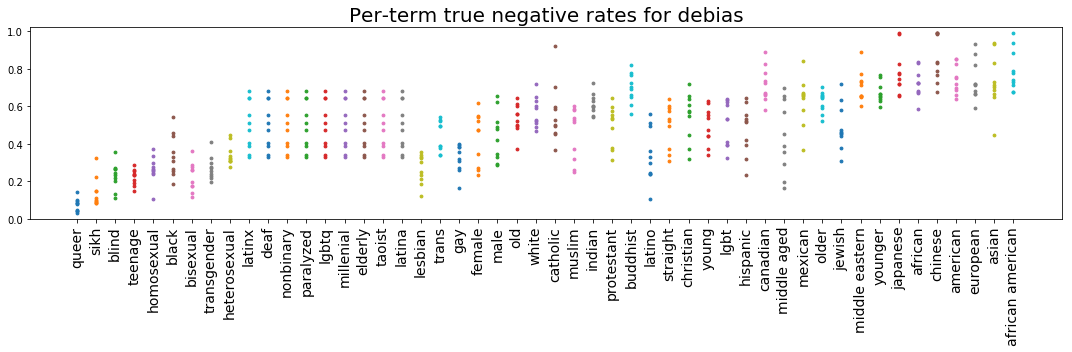

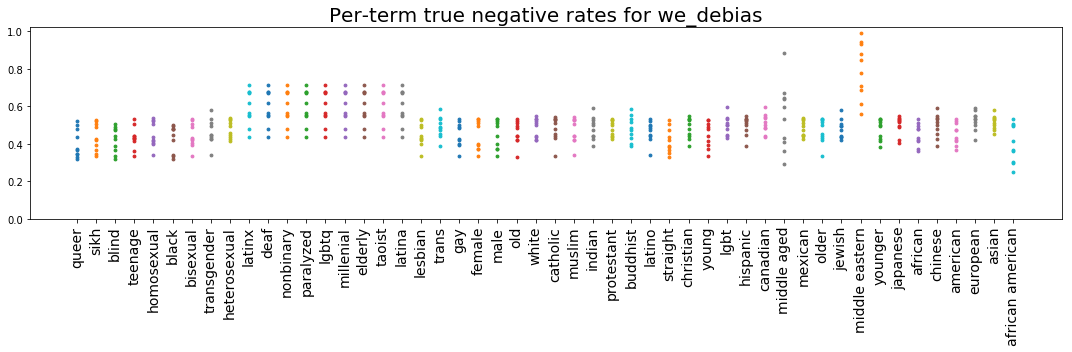

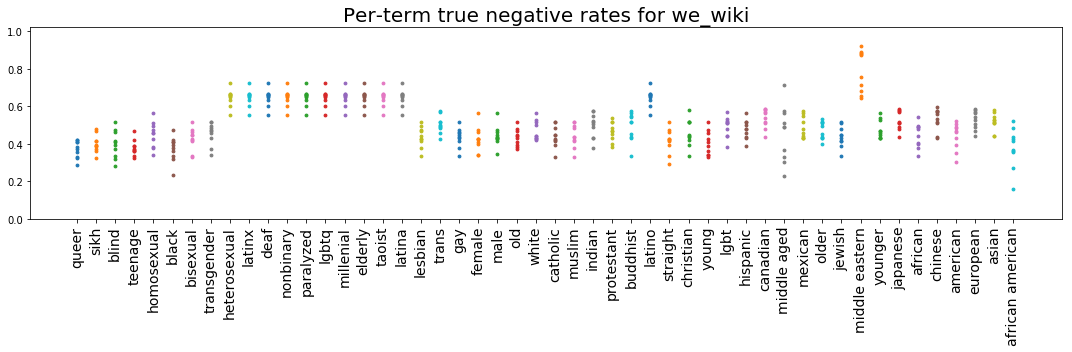

In [74]:
# True negative rates: TN / (TN + FP)

_raw_term_neg_rates_madlibs_eer_sorted = _raw_term_neg_rates_madlibs_eer.sort_values('wiki_debias_cnn_v3_10_tnr_values')
orig_tnr = 'wiki_cnn_v3_10_tnr_values'
random_tnr = 'wiki_debias_random_cnn_v3_10_tnr_values'
debias_tnr= 'wiki_debias_cnn_v3_10_tnr_values'
we_debias_tnr = 'cnn_debias_tox_v3_debiased_WE_10_tnr_values'
we_wiki_tnr = 'we_wiki_cnn_10_tnr_values'
for title, tnr_values_col in [('original',orig_tnr), ('random',random_tnr), ('debias',debias_tnr),('we_debias',we_debias_tnr),('we_wiki',we_wiki_tnr)]:
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_neg_rates_madlibs_eer_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='madlibs')

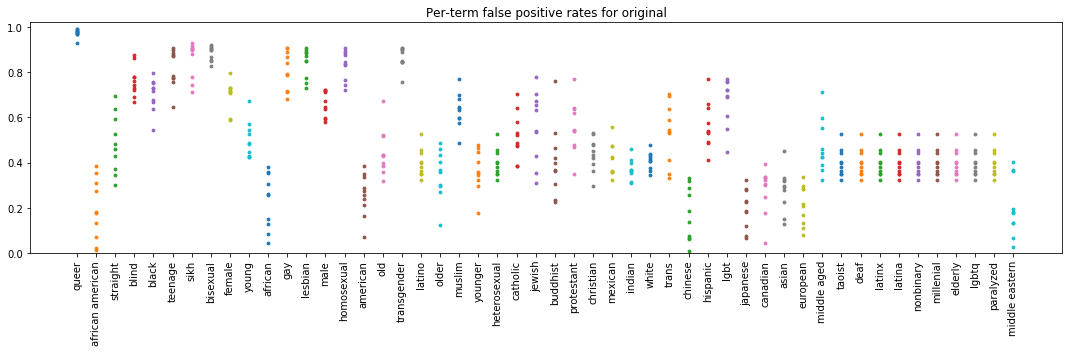

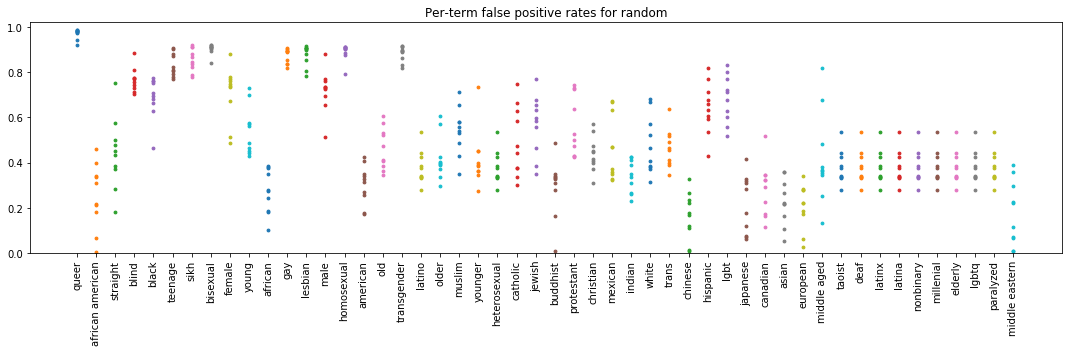

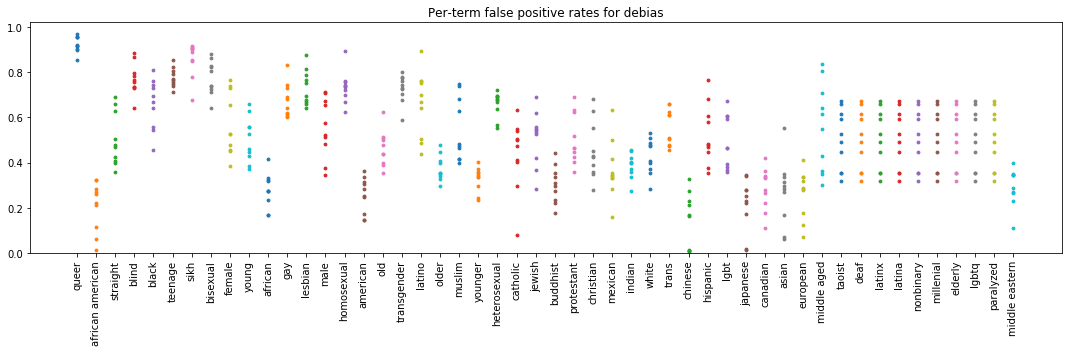

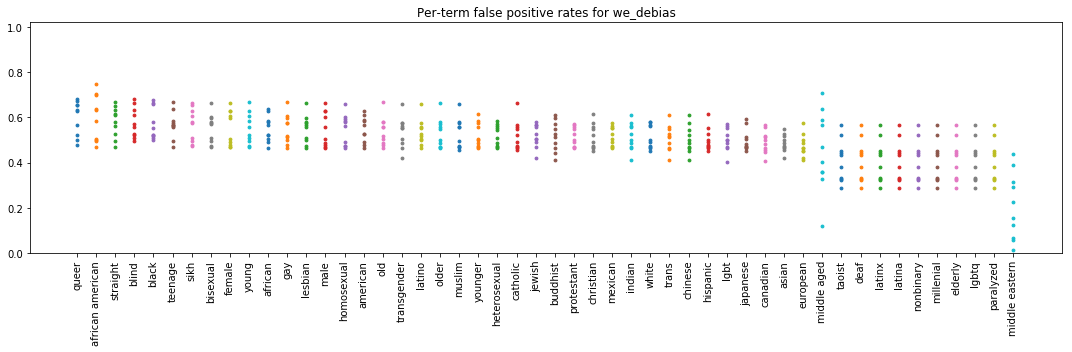

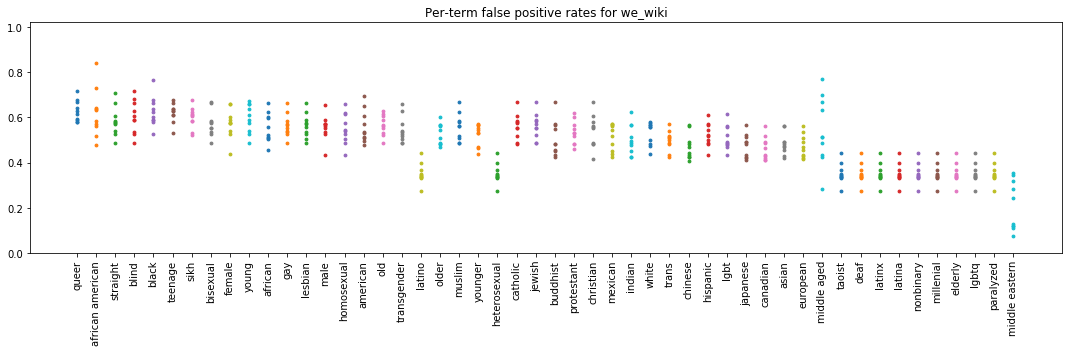

In [36]:
# False positive rates: 1 - TNR. This is just the above graphs except flipped to show false positives instead of true negatives.

# _term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original',orig_tnr), ('random',random_tnr), ('debias',debias_tnr),('we_debias',we_debias_tnr),('we_wiki',we_wiki_tnr)]:
    term_fpr_values = []
    for _i, row in _raw_term_neg_rates_madlibs_eer_sorted.iterrows():
        tnr_values = row[tnr_values_col]
        fpr_values = [1 - tnr for tnr in tnr_values]
        term_fpr_values.append({'subgroup': row['subgroup'], 'fpr_values': fpr_values})
    fpr_df = pd.DataFrame(term_fpr_values)
    model_bias_analysis.per_subgroup_scatterplots(
        fpr_df, 'subgroup', 'fpr_values', y_lim=(0, 1.02),
        title='Per-term false positive rates for ' + title,
        file_name='madlibs_' + tnr_values_col)

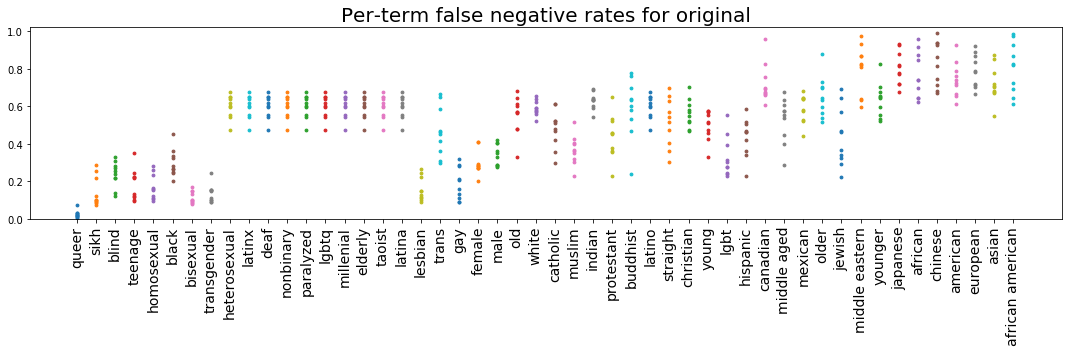

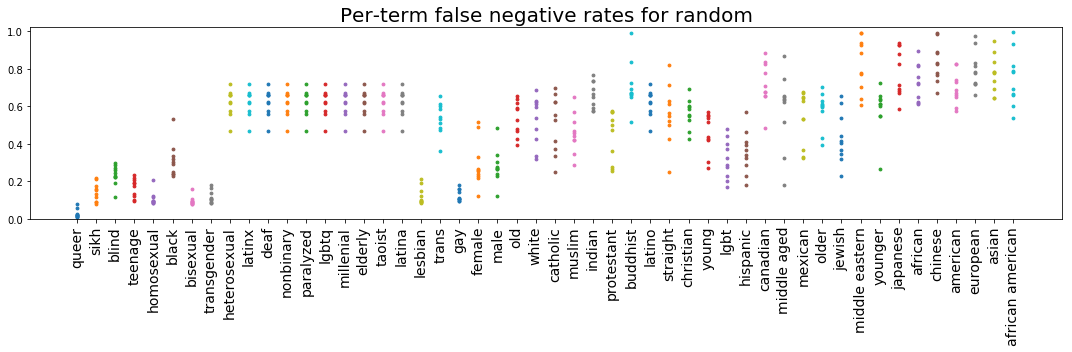

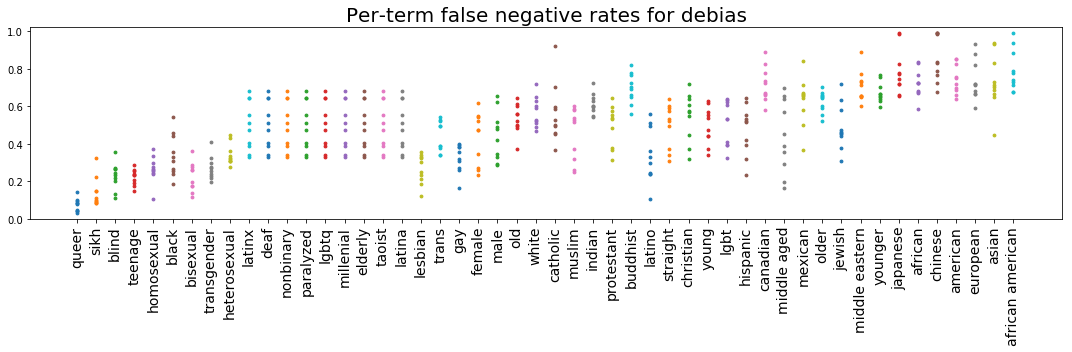

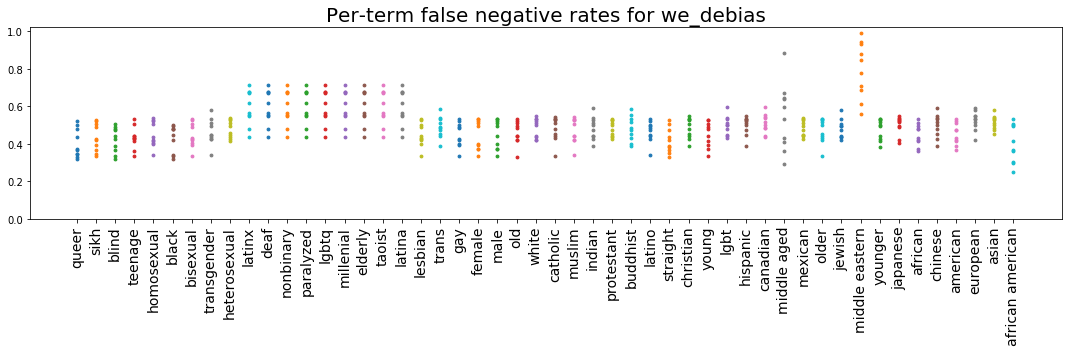

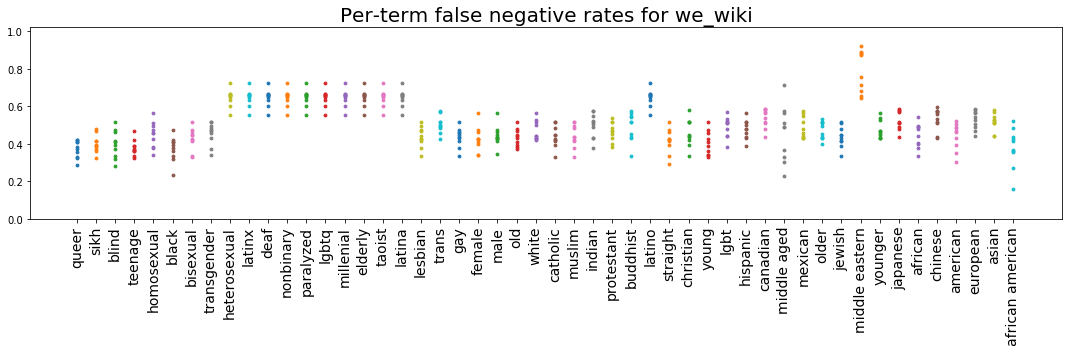

In [73]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_raw_term_neg_rates_madlibs_eer_sorted = _raw_term_neg_rates_madlibs_eer.sort_values('wiki_debias_cnn_v3_10_fnr_values')
orig_fnr = 'wiki_cnn_v3_10_fnr_values'
random_fnr = 'wiki_debias_random_cnn_v3_10_fnr_values'
debias_fnr= 'wiki_debias_cnn_v3_10_fnr_values'
we_debias_fnr = 'cnn_debias_tox_v3_debiased_WE_10_fnr_values'
we_wiki_fnr = 'we_wiki_cnn_10_fnr_values'
for title, fnr_values_col in [('original',orig_fnr), ('random',random_fnr), ('debias',debias_fnr),('we_debias',we_debias_fnr),('we_wiki',we_wiki_fnr)]:
    #_term_neg_rates_madlibs_eer_fnr_sorted
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_neg_rates_madlibs_eer_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title,
        file_name='madlibs')

### Threshold using per-model equal error rate on Wikipedia test set

The EERs computed on the wikipedia test set are similar, and so we don't see much difference in the per-term negative rates plots.

In [38]:
# %%time

# # Compute the equal error rate for all models on the wikipedia dataset.

# _model_eers_wiki = model_bias_analysis.per_model_eer(wiki_test, 'label', _all_model_names)

In [39]:
# %%time
# _raw_term_neg_rates_wiki_eer = model_bias_analysis.per_subgroup_negative_rates(
#     madlibs, madlibs_terms, all_model_families_names, _model_eers_wiki, 'label')
# _term_neg_rates_wiki_eer = _raw_term_neg_rates_wiki_eer.rename(columns=column_renamer)

In [40]:
# # True negative rates: TN / (TN + FP)

# _term_neg_rates_wiki_eer_tnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_tnr_mean')

# for title, tnr_values_col in [('original model', 'orig_tnr_values'),
#                               ('random treatment', 'random_tnr_values'),
#                               ('debiasing treatment', 'debias_tnr_values')]:
#     model_bias_analysis.per_subgroup_scatterplots(
#         _term_neg_rates_wiki_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
#         title='Per-term true negative rates for ' + title, file_name='wiki')

In [41]:
# # False negative rates: FN / (FN + TP). 1 - TPR.

# # Should we use the same ordering as the true negative rate plots?
# _term_neg_rates_wiki_eer_fnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_fnr_mean')

# for title, fnr_values_col in [('original model', 'orig_fnr_values'),
#                               ('random treatment', 'random_fnr_values'),
#                               ('debiasing treatment', 'debias_fnr_values')]:
#     model_bias_analysis.per_subgroup_scatterplots(
#         _term_neg_rates_wiki_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
#         title='Per-term false negative rates for ' + title, file_name='wiki')

In [42]:
# all_model_families_names print

In [77]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, .5, False)

,model_family,fnr_equality_difference
0,we_wiki_cnn_10,13.112318
1,wiki_cnn_v3_10,22.192094
2,wiki_debias_cnn_v3_10,22.958078
3,wiki_debias_random_cnn_v3_10,24.723705
4,cnn_debias_tox_v3_debiased_WE_10,8.918915


In [78]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, .5, False)

,model_family,tnr_equality_difference
0,we_wiki_cnn_10,13.112318
1,wiki_cnn_v3_10,22.192094
2,wiki_debias_cnn_v3_10,22.958078
3,wiki_debias_random_cnn_v3_10,24.723705
4,cnn_debias_tox_v3_debiased_WE_10,8.918915


In [79]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,we_wiki_cnn_10,1.970239
1,wiki_cnn_v3_10,5.891528
2,wiki_debias_cnn_v3_10,3.830329
3,wiki_debias_random_cnn_v3_10,6.618530
4,cnn_debias_tox_v3_debiased_WE_10,1.779427


# new

In [46]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,we_wiki_cnn_10,1.970239
1,wiki_cnn_v3_10,5.891528
2,wiki_debias_cnn_v3_10,3.830329
3,wiki_debias_random_cnn_v3_10,6.618530
4,cnn_debias_tox_v3_debiased_WE_10,1.779427


In [47]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs,False)

,model_family,fnr_equality_difference
0,we_wiki_cnn_10,43.260184
1,wiki_cnn_v3_10,93.857125
2,wiki_debias_cnn_v3_10,85.603173
3,wiki_debias_random_cnn_v3_10,100.421053
4,cnn_debias_tox_v3_debiased_WE_10,32.792898


In [48]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,tnr_equality_difference
0,we_wiki_cnn_10,43.260184
1,wiki_cnn_v3_10,93.857125
2,wiki_debias_cnn_v3_10,85.603173
3,wiki_debias_random_cnn_v3_10,100.421053
4,cnn_debias_tox_v3_debiased_WE_10,32.792898


In [72]:
tp
for index, row in madlibs.iterrows():
    print(row)
    break

text                             murder american
Template                                verb_adj
label                                       True
wiki_cnn_v3_100                         0.186974
wiki_cnn_v3_101                         0.328728
wiki_cnn_v3_102                         0.082798
wiki_cnn_v3_103                          0.29868
wiki_cnn_v3_104                         0.207315
wiki_cnn_v3_105                         0.262564
wiki_cnn_v3_106                         0.217602
wiki_cnn_v3_107                         0.176932
wiki_cnn_v3_108                         0.195168
wiki_cnn_v3_109                         0.153073
wiki_debias_random_cnn_v3_100          0.0965331
wiki_debias_random_cnn_v3_101           0.144673
wiki_debias_random_cnn_v3_102           0.163043
wiki_debias_random_cnn_v3_103           0.111885
wiki_debias_random_cnn_v3_104          0.0611574
wiki_debias_random_cnn_v3_105          0.0651073
wiki_debias_random_cnn_v3_106          0.0436598
wiki_debias_random_c